In [3]:
import numpy as np
import pandas as pd 
df = pd.read_csv(r"C:\Users\kopur\Downloads\diabetes.csv")
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [4]:
#Descriptive statistics

print("Dataset Shape:", df.shape)
df.info()
df.describe()

Dataset Shape: (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
#Missing values 
zero_cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

(df[zero_cols] == 0).sum()
df[zero_cols] = df[zero_cols].replace(0, np.nan)
df.isna().sum()
for col in zero_cols:
    df[col] = df[col].fillna(df[col].median())


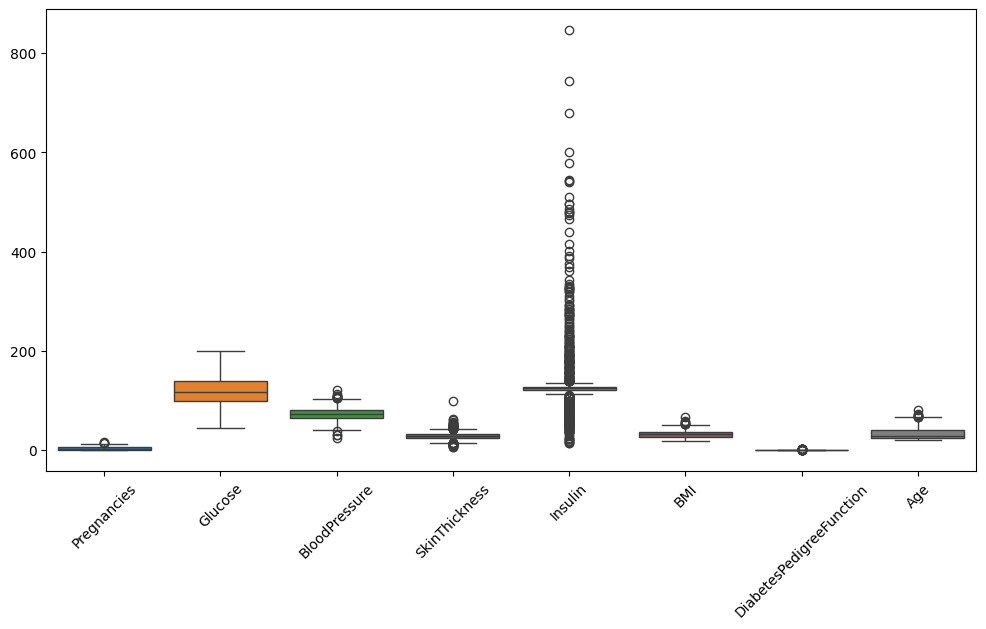

In [6]:
#Boxplot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.boxplot(data=df.drop(columns='Outcome'))
plt.xticks(rotation=45)
plt.show()


In [7]:
#Outlier capping using IQR
for col in df.columns[:-1]:   # exclude Outcome
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower, lower,
                       np.where(df[col] > upper, upper, df[col]))


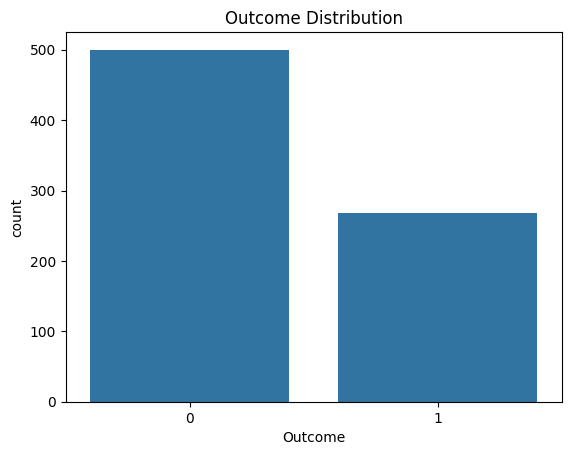

In [8]:
#Target variable distribution
sns.countplot(x='Outcome', data=df)
plt.title("Outcome Distribution")
plt.show()


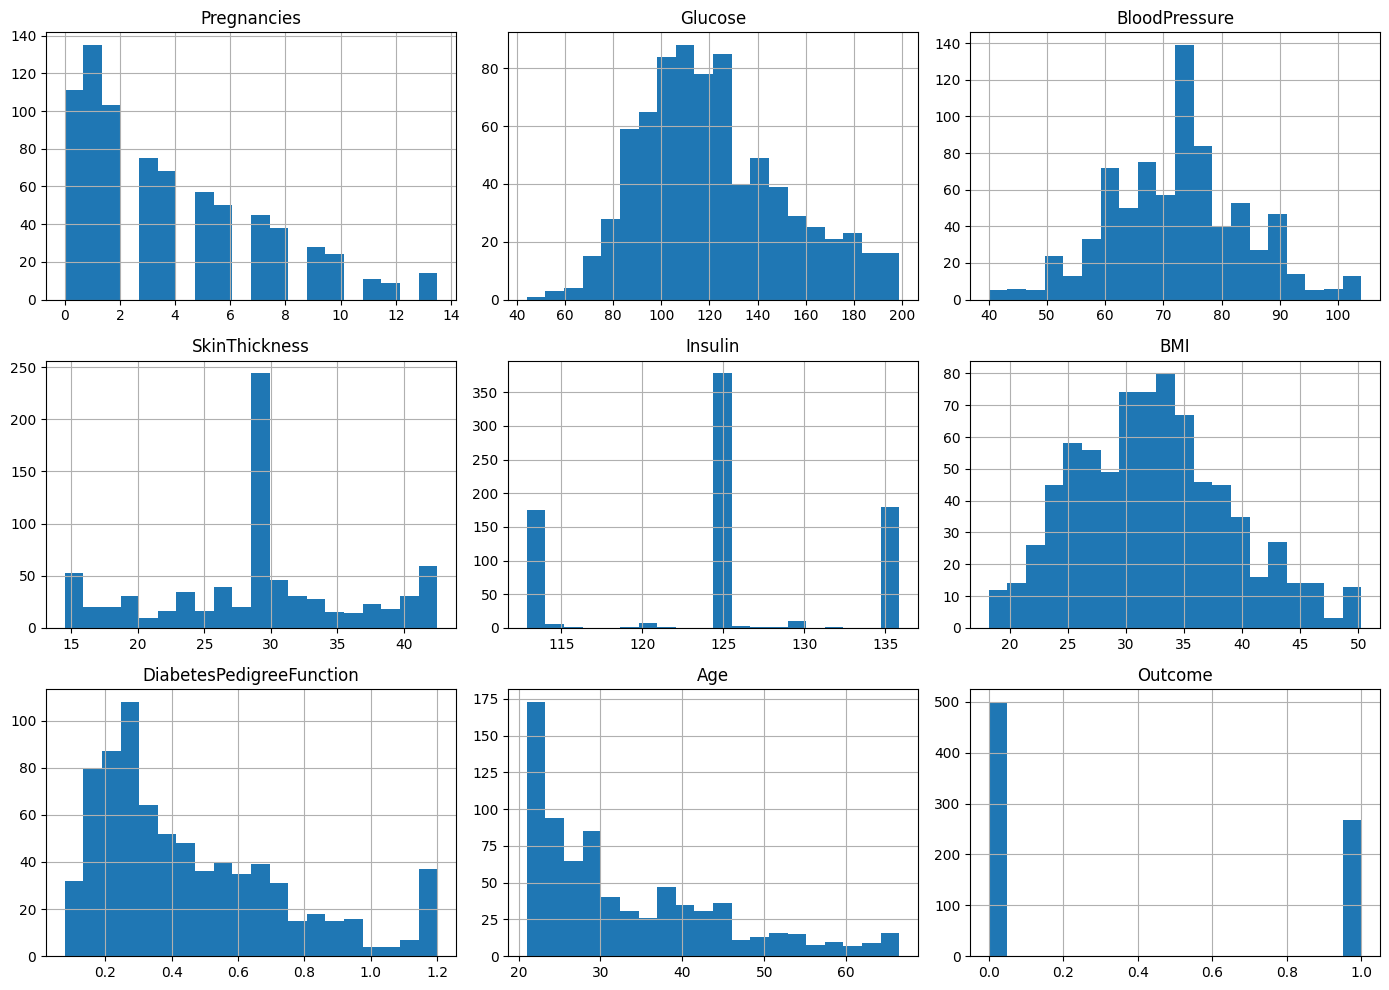

In [9]:
#Feature distributions
df.hist(figsize=(14,10), bins=20)
plt.tight_layout()
plt.show()


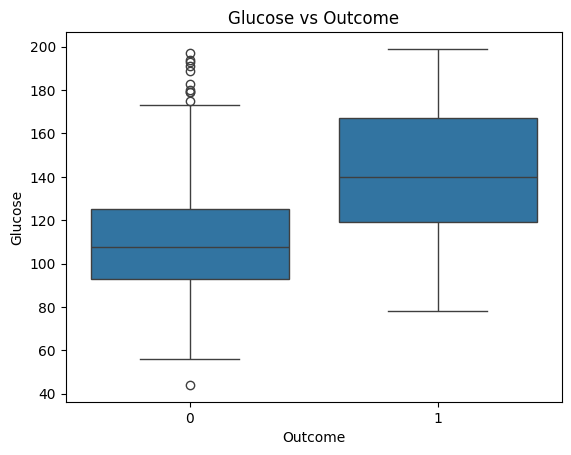

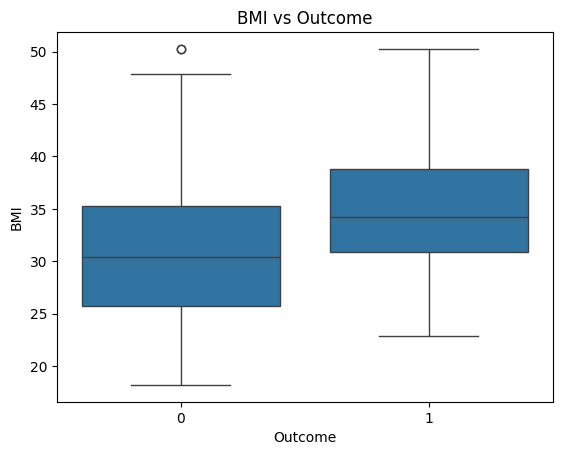

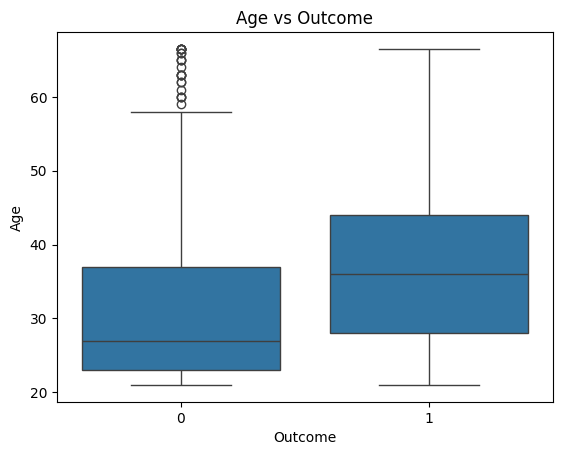

In [10]:
#Feature vs Outcome
for col in ['Glucose','BMI','Age']:
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.title(f"{col} vs Outcome")
    plt.show()


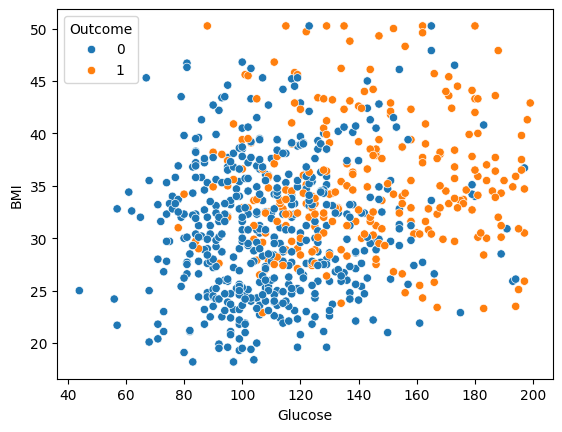

In [11]:
#Relationship between key features
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df)
plt.show()


In [12]:
#Correlation matrix
corr = df.corr(numeric_only=True)
corr


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.126856,0.210906,0.110471,0.097060,0.027159,-0.017398,0.549695,0.220392
Glucose,0.126856,1.000000,0.220199,0.181371,0.413981,0.233590,0.118457,0.268912,0.492782
BloodPressure,0.210906,0.220199,1.000000,0.204136,0.107028,0.286543,0.012305,0.332898,0.168971
SkinThickness,0.110471,0.181371,0.204136,1.000000,0.200742,0.559843,0.073051,0.125169,0.220111
Insulin,0.097060,0.413981,0.107028,0.200742,1.000000,0.184982,0.089418,0.170824,0.266382
BMI,0.027159,0.233590,0.286543,0.559843,0.184982,1.000000,0.138378,0.035697,0.312811
DiabetesPedigreeFunction,-0.017398,0.118457,0.012305,0.073051,0.089418,0.138378,1.000000,0.047289,0.184969
Age,0.549695,0.268912,0.332898,0.125169,0.170824,0.035697,0.047289,1.000000,0.242702
Outcome,0.220392,0.492782,0.168971,0.220111,0.266382,0.312811,0.184969,0.242702,1.000000


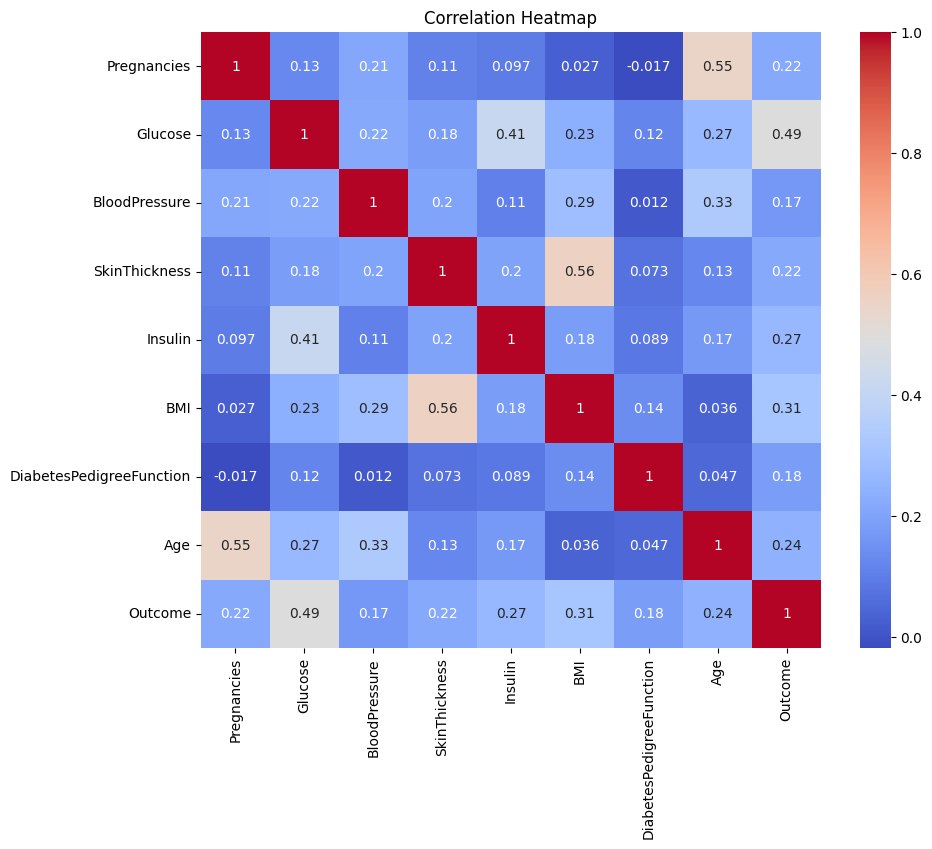

In [13]:
#Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## Minimum and Maximum Reference Values for Dataset Features

The table below shows the **least possible** and **maximum acceptable** reference values for each feature in the dataset.

| Column Name | Minimum Value | Maximum Value |
|------------|---------------|---------------|
| **Pregnancies** | 0 | 15 |
| **Glucose** | 70 | 200 |
| **BloodPressure** | 60 | 140 |
| **SkinThickness** | 10 | 50 |
| **Insulin** | 2 | 300 |
| **BMI** | 18.5 | 50 |
| **DiabetesPedigreeFunction** | 0.0 | 2.5 |
| **Age** | 18 | 80 |
| **Outcome** | 0 | 1 |

> These bounds are used in EDA to flag outliers and abnormal observations.


In [14]:
import numpy as np
import pandas as pd

# Columns where 0 is considered invalid / missing
zero_cols = [
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI'
]

# Replace 0 with NaN first
df[zero_cols] = df[zero_cols].replace(0, np.nan)

# Replace NaN with median of each column
for col in zero_cols:
    df[col] = df[col].fillna(df[col].median())
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0  125.000  33.6   
1            1.0     85.0           66.0           29.0  125.000  26.6   
2            8.0    183.0           64.0           29.0  125.000  23.3   
3            1.0     89.0           66.0           23.0  112.875  28.1   
4            0.0    137.0           40.0           35.0  135.875  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           42.5  135.875  32.9   
764          2.0    122.0           70.0           27.0  125.000  36.8   
765          5.0    121.0           72.0           23.0  112.875  26.2   
766          1.0    126.0           60.0           29.0  125.000  30.1   
767          1.0     93.0           70.0           31.0  125.000  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0        1  
1                

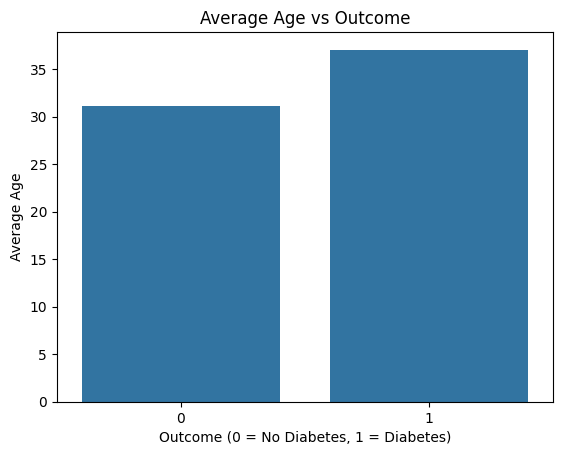

In [15]:
age_outcome = df.groupby('Outcome')['Age'].mean().reset_index()

# Bar plot
sns.barplot(x='Outcome', y='Age', data=age_outcome)
plt.title("Average Age vs Outcome")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Average Age")
plt.show()

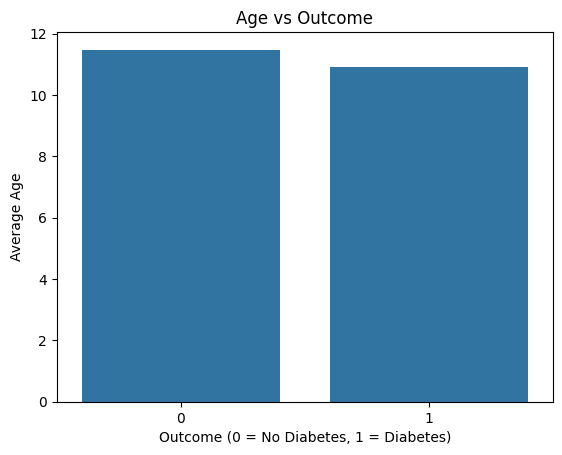

In [18]:
age_outcome = df.groupby('Outcome')['Age'].std().reset_index()

# Bar plot
sns.barplot(x='Outcome', y='Age', data=age_outcome)
plt.title( "Age vs Outcome")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Average Age")
plt.show()

In [38]:
df['Age'].groupby(df['Outcome']).mean()

Outcome
0    31.135000
1    37.052239
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Outcome'>

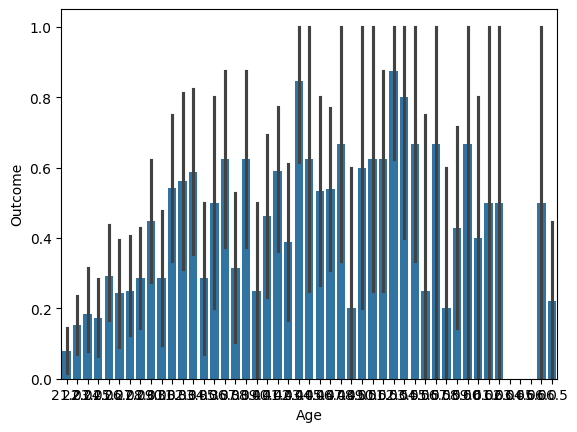

In [39]:
sns.barplot(x=df['Age'],y=df['Outcome'],estimator='mean')

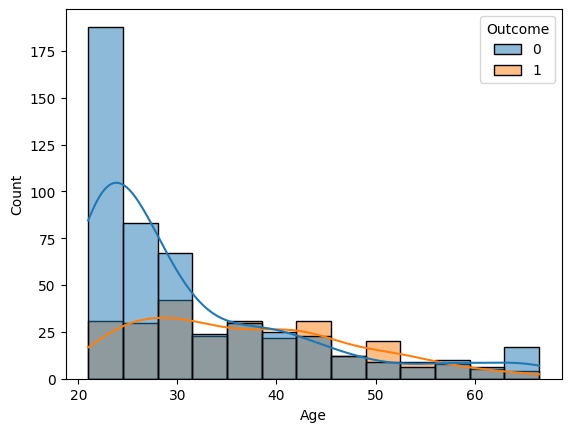

In [40]:
sns.histplot(x='Age',hue='Outcome',data=df,kde=True)
plt.show()

In [41]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [43]:
df['BMI'].groupby(df['Outcome']).mean()

Outcome
0    30.867400
1    35.240299
Name: BMI, dtype: float64

<Axes: xlabel='BMI', ylabel='Outcome'>

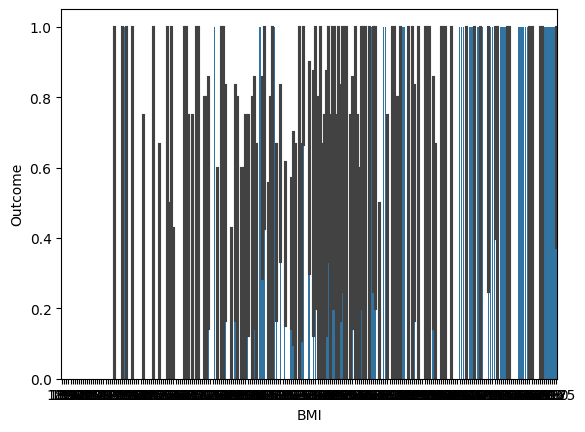

In [44]:
sns.barplot(x=df['BMI'],y=df['Outcome'],estimator='mean')

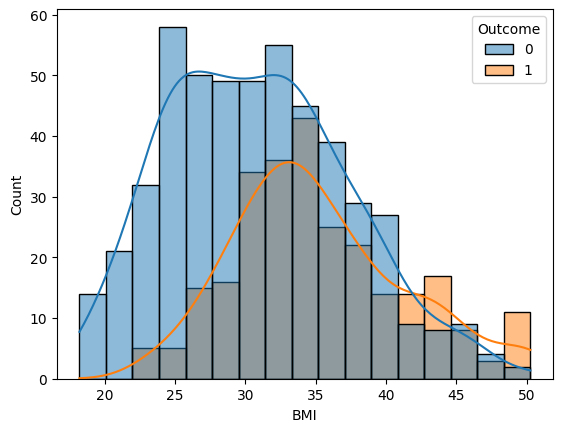

In [36]:
sns.histplot(x='BMI',hue='Outcome',data=df,kde=True)
plt.show()

In [37]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [45]:
die_age = df['Age'][df['Outcome']==1]
nondie_age = df['Age'][df['Outcome'] ==0]

In [46]:
from scipy.stats import ttest_ind
stat,p = ttest_ind(die_age,nondie_age)
alpha = 0.5
if p < alpha:
    print('Reject H0')
else:
    print('Accept H0')


Reject H0


In [48]:
die_bmi = df['BMI'][df['Outcome']==1]
nondie_bmi = df['BMI'][df['Outcome'] ==0]

In [49]:
from scipy.stats import ttest_ind
stat,p = ttest_ind(die_age,nondie_age)
alpha = 0.5
if p < alpha:
    print('Reject H0')
else:
    print('Accept H0')

Reject H0


In [50]:
die_bp = df['BloodPressure'][df['Outcome']==1]
nondie_bp = df['BloodPressure'][df['Outcome'] ==0]
from scipy.stats import ttest_ind
stat,p = ttest_ind(die_age,nondie_age)
alpha = 0.5
if p < alpha:
    print('Reject H0')
else:
    print('Accept H0')

Reject H0


In [51]:
df['BloodPressure'].groupby(df['Outcome']).mean()

Outcome
0    70.91200
1    75.05597
Name: BloodPressure, dtype: float64

<Axes: xlabel='BloodPressure', ylabel='Outcome'>

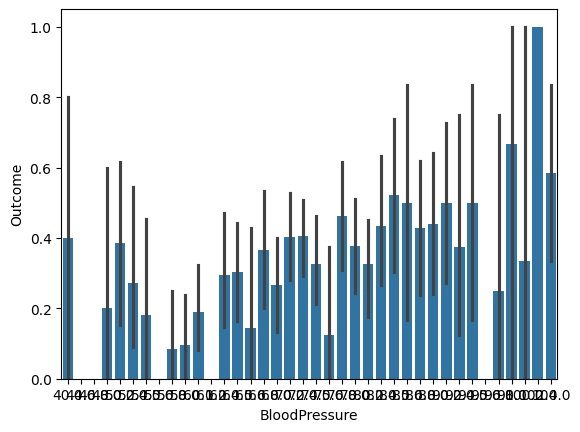

In [52]:
sns.barplot(x=df['BloodPressure'],y=df['Outcome'],estimator='mean')

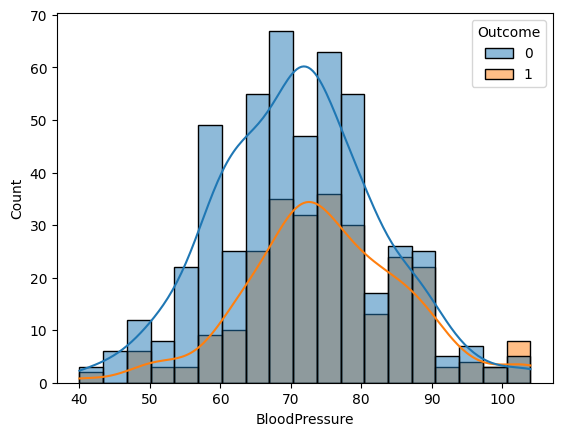

In [56]:
df['BloodPressure'].groupby(df['Outcome']).std()
sns.histplot(x='BloodPressure',hue='Outcome',data=df,kde=True)
plt.show()

<Axes: xlabel='BloodPressure'>

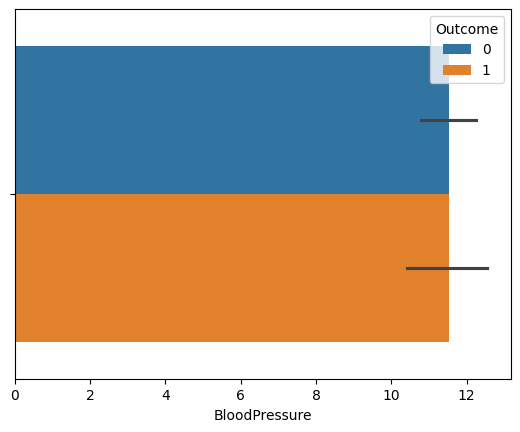

In [57]:
df['BloodPressure'].groupby(df['Outcome']).mean()
df['BloodPressure'].groupby(df['Outcome']).std()
sns.barplot(x=df['BloodPressure'],hue=df['Outcome'],estimator='std')

<Axes: xlabel='Insulin'>

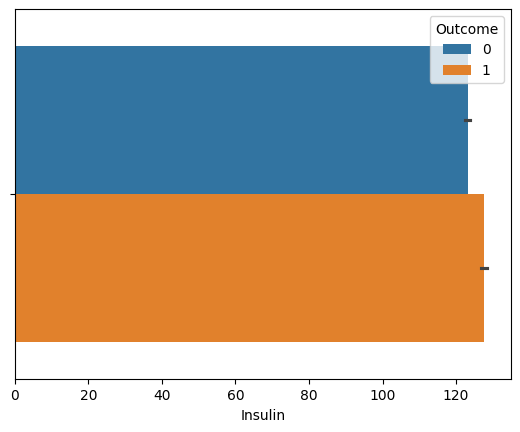

In [71]:
df['Insulin'].groupby(df['Outcome']).mean()
df['Insulin'].groupby(df['Outcome']).std()
sns.barplot(x=df['Insulin'],hue=df['Outcome'],estimator='mean')

<Axes: xlabel='Insulin', ylabel='Outcome'>

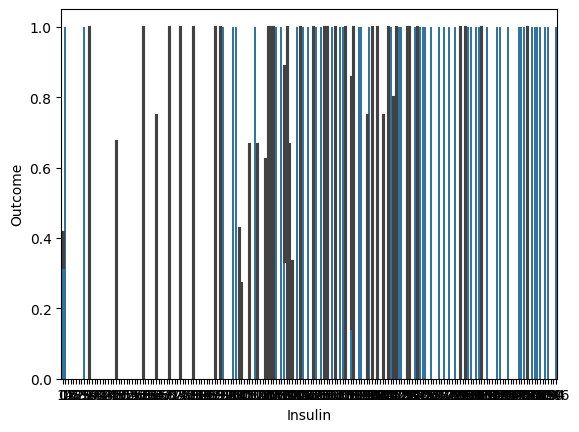

In [74]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')

df['Insulin'].groupby(df['Outcome']).std()

sns.barplot(x=df['Insulin'],y=df['Outcome'],estimator='mean')

<Axes: xlabel='Insulin', ylabel='Count'>

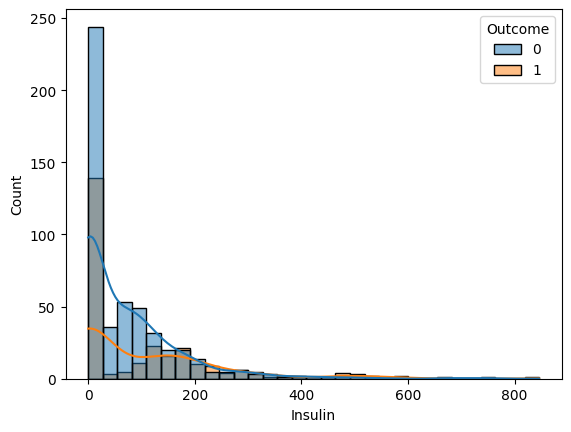

In [75]:
import pandas as pd
data=pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')

data['Insulin'].groupby(data['Outcome']).std()

sns.histplot(x="Insulin",hue="Outcome",data=data,kde=True)

<Axes: xlabel='Insulin'>

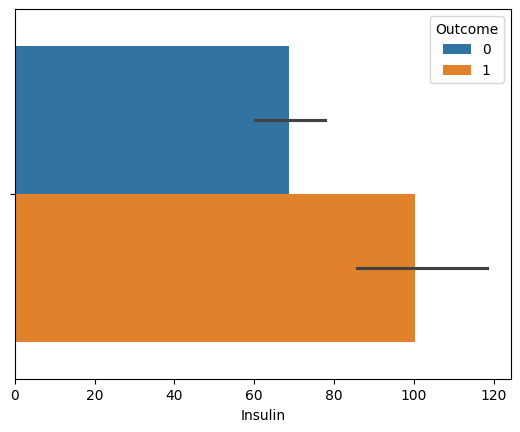

In [77]:
import pandas as pd
data=pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')

data['Insulin'].groupby(data['Outcome']).mean()
data['Insulin'].groupby(data['Outcome']).std()
sns.barplot(x=data['Insulin'],hue=data['Outcome'],estimator='mean')

### Insights
 1. Insulin is used to predict the output

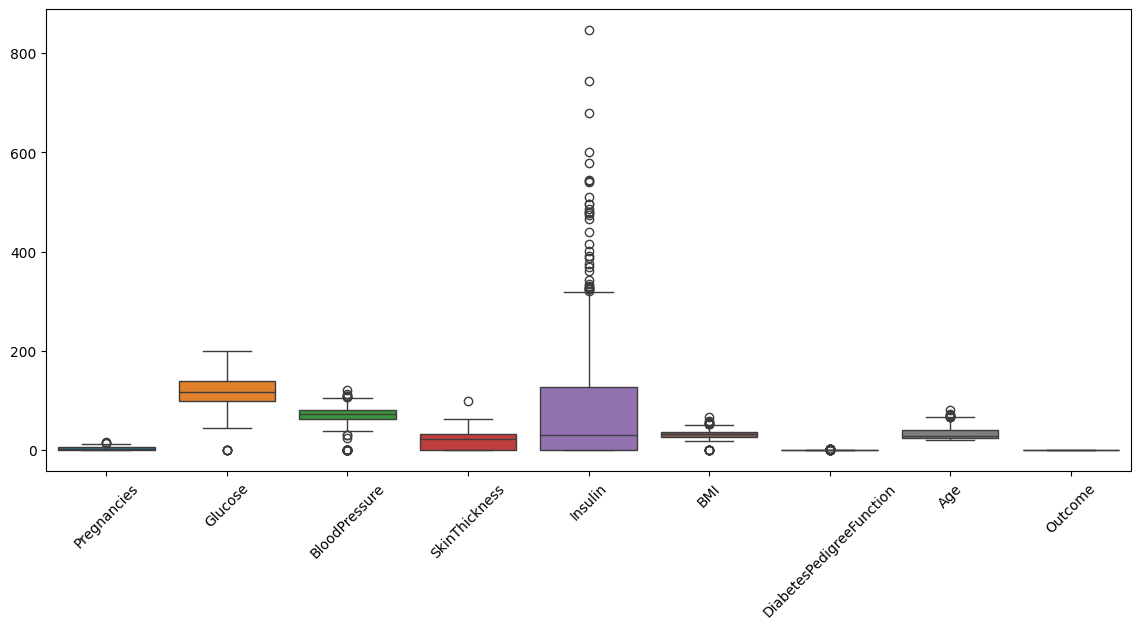

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.show()

In [82]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

X = data.drop('Outcome', axis=1)
y = data['Outcome']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

final_data = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)
print(final_data.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3     0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4     0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.483333        1  
1                  0.116567  0.166667        0  
2                  0.253629  0.183333        1  
3                  0.038002  0.000000        0  
4                  0.943638  0.200000        1  


In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state = 45)
X_train,X_test

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 172            2       87              0             23        0  28.9   
 405            2      123             48             32      165  42.1   
 357           13      129              0             30        0  39.9   
 483            0       84             82             31      125  38.2   
 738            2       99             60             17      160  36.6   
 ..           ...      ...            ...            ...      ...   ...   
 725            4      112             78             40        0  39.4   
 607            1       92             62             25       41  19.5   
 544            1       88             78             29       76  32.0   
 643            4       90              0              0        0  28.0   
 414            0      138             60             35      167  34.6   
 
      DiabetesPedigreeFunction  Age  
 172                     0.773   25  
 405                  

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7359307359307359


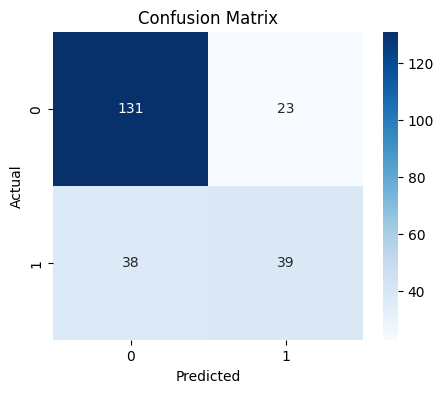

In [91]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [92]:
y_pred_prob = model.predict_proba(X_test_scaled)
y_pred_prob

array([[3.19496359e-01, 6.80503641e-01],
       [9.18675397e-01, 8.13246029e-02],
       [7.41816691e-01, 2.58183309e-01],
       [5.17191957e-01, 4.82808043e-01],
       [8.93283112e-01, 1.06716888e-01],
       [8.66128424e-01, 1.33871576e-01],
       [5.88855647e-01, 4.11144353e-01],
       [9.67932092e-01, 3.20679084e-02],
       [2.32706989e-01, 7.67293011e-01],
       [9.41723804e-01, 5.82761960e-02],
       [1.29970522e-01, 8.70029478e-01],
       [5.40135387e-01, 4.59864613e-01],
       [9.64690260e-01, 3.53097396e-02],
       [3.95925097e-01, 6.04074903e-01],
       [8.05746970e-01, 1.94253030e-01],
       [9.44565013e-01, 5.54349873e-02],
       [1.35286299e-02, 9.86471370e-01],
       [5.14968351e-01, 4.85031649e-01],
       [2.46939754e-01, 7.53060246e-01],
       [9.73780457e-01, 2.62195425e-02],
       [3.02526064e-01, 6.97473936e-01],
       [7.16649634e-01, 2.83350366e-01],
       [5.20408025e-01, 4.79591975e-01],
       [8.73609752e-01, 1.26390248e-01],
       [9.984377